In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import log_loss
import itertools
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


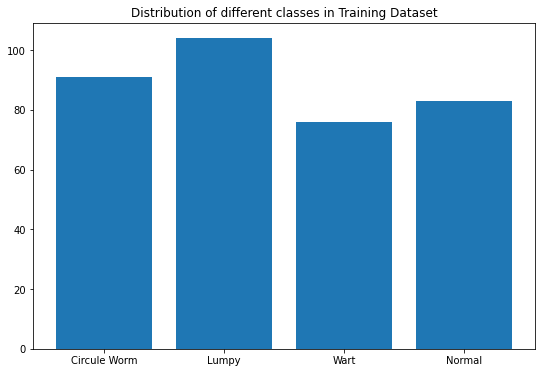

In [ ]:
image_folder = ['Circule Worm', 'Lumpy', 'Wart', 'Normal']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Dataset/Training_Data/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['Circule Worm', 'Lumpy', 'Wart', 'Normal']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Dataset/Training_Data/'+i+'/'))))

Training Circule Worm images are: 91
Training Lumpy images are: 104
Training Wart images are: 76
Training Normal images are: 83


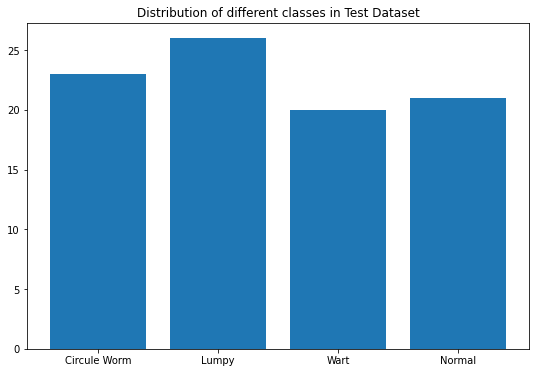

In [ ]:
image_folder = ['Circule Worm', 'Lumpy', 'Wart', 'Normal']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/Dataset/Test_Data/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

In [ ]:
for i in ['Circule Worm', 'Lumpy', 'Wart', 'Normal']:
    print('Test {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/Dataset/Test_Data/'+i+'/'))))

Test Circule Worm images are: 23
Test Lumpy images are: 26
Test Wart images are: 20
Test Normal images are: 21


In [ ]:
img_width=224; img_height=224

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Dataset/Training_Data/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 346 images belonging to 4 classes.


In [ ]:
TEST_DIR = '/content/drive/MyDrive/Dataset/Test_Data/'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                              batch_size=1,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 78 images belonging to 4 classes.


In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = False)

In [ ]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(512, (3, 3), activation='relu'), 
    Dropout(0.20),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),#why?
    Dense(4, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       7

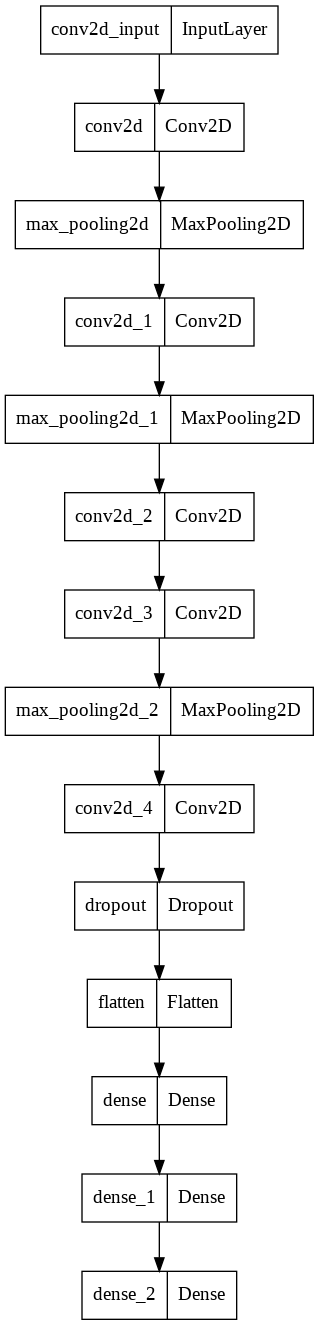

In [ ]:
plot_model(model, to_file='ModelDenseNet.png')

In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(factor=0.2, min_lr=0.01)

In [ ]:
history = model.fit(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data=test_generator,
                              callbacks = [learning_rate_reduction]
                    )

Epoch 1/100
22/22 [==============================] - 65s 2s/step - loss: 1.6172 - accuracy: 0.2601 - val_loss: 1.3858 - val_accuracy: 0.2179 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 11s 488ms/step - loss: 1.3847 - accuracy: 0.2775 - val_loss: 1.3808 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 11s 487ms/step - loss: 1.3815 - accuracy: 0.3006 - val_loss: 1.3729 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 11s 493ms/step - loss: 1.3624 - accuracy: 0.3468 - val_loss: 1.3563 - val_accuracy: 0.3718 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 11s 491ms/step - loss: 1.3449 - accuracy: 0.3815 - val_loss: 1.2861 - val_accuracy: 0.4103 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 11s 486ms/step - loss: 1.3142 - accuracy: 0.3988 - val_loss: 1.2911 - val_accuracy: 0.4103 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 11s 484m

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/SamiCNNArch.h5')

In [ ]:
print("Accuracy of the model is-" , model.evaluate(train_generator)[1]*100, "%")
print("loss of the model is-" , model.evaluate(test_generator)[0])

22/22 [==============================] - 9s 412ms/step - loss: 0.4097 - accuracy: 0.8584
Accuracy of the model is- 85.83815097808838 %
78/78 [==============================] - 2s 28ms/step - loss: 1.8277 - accuracy: 0.5769
loss of the model is- 1.8276844024658203


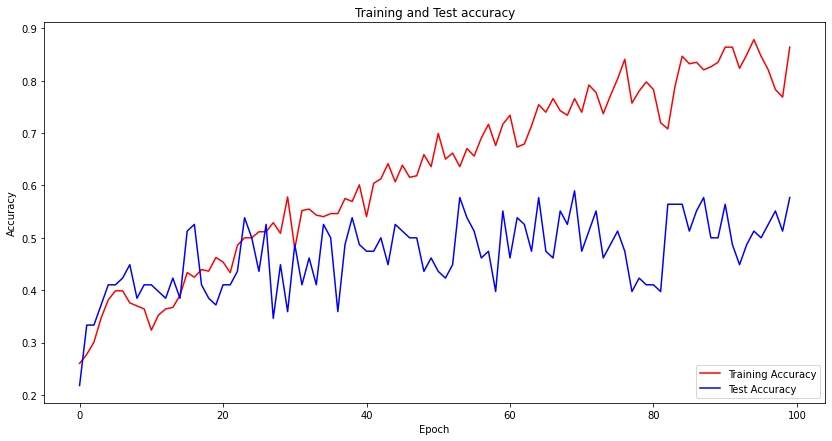

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Test Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and Test loss')

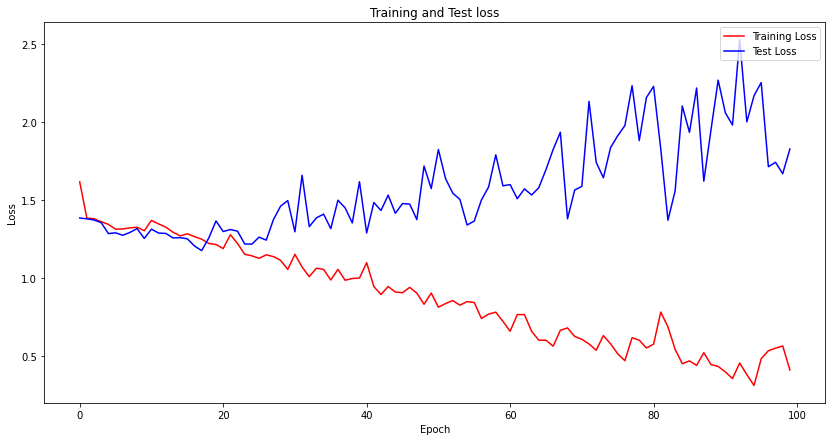

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Test Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test loss')

In [ ]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
test_images_dir = '/content/drive/MyDrive/COPD/Test1/'
test_df = pd.read_csv('/content/drive/MyDrive/COPD/COPD_Test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
test_images_dir = '/content/drive/MyDrive/COPD/Test1/'
test_df = pd.read_csv('/content/drive/MyDrive/COPD/COPD_Test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 1s 8ms/step
[0 0 0 0 1 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 3 3 3 0 2 2 1 2 2 2]


In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 10ms/step
[0 0 0 0 1 2 2 2 2 1 1 1 1 1 1 1 2 2 1 2 3 3 3 0 2 2 1 2 2 2]


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/COPD/COPD_Test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/COPD/COPD_Test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [ ]:
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[4, 0, 0, 0, 0],
       [0, 5, 5, 0, 0],
       [0, 1, 5, 0, 0],
       [0, 0, 0, 3, 0],
       [1, 1, 5, 0, 0]])

In [ ]:
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[4, 0, 0, 0, 0],
       [0, 6, 4, 0, 0],
       [0, 3, 3, 0, 0],
       [0, 0, 0, 3, 0],
       [1, 1, 5, 0, 0]])

In [ ]:
train_dir = '/content/drive/MyDrive/COPD DS/train/'
classes = os.listdir(train_dir)


In [ ]:
train_dir = '/content/drive/MyDrive/COPD DS/train/'
classes = os.listdir(train_dir)


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

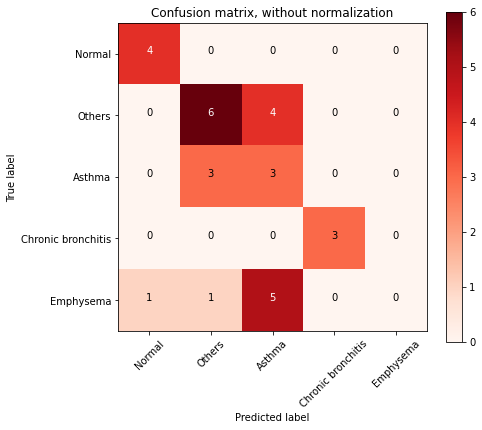

In [ ]:

np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()